In [ ]:
from pandas_datareader import data 
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.8 MB/s 
     |████████████████████████████████| 128 kB 7.7 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 112 kB 49.8 MB/s 
     |████████████████████████████████| 4.0 MB 61.4 MB/s 
     |████████████████████████████████| 110 kB 54.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import yfinance as yf
yf.pdr_override()

In [ ]:
start = '2012-01-01'
end = '2022-12-31'

df = data.get_data_yahoo('AAPL', start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519279,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586562,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726294,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859334,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838938,394024400


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-16,136.690002,137.649994,133.729996,134.509995,134.509995,160080100
2022-12-19,135.110001,135.199997,131.320007,132.369995,132.369995,79592600
2022-12-20,131.389999,133.250000,129.889999,132.300003,132.300003,77432800
2022-12-21,132.979996,136.809998,132.750000,135.449997,135.449997,85928000
2022-12-22,134.350006,134.559998,130.300003,132.229996,132.229996,77714600


In [ ]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519279,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586562,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726294,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859334,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838938,394024400


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400


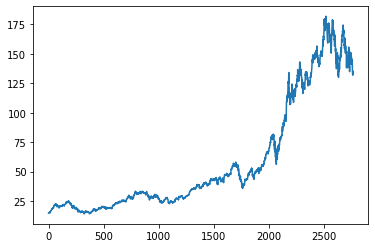

In [ ]:
plt.plot(df.Close)

In [ ]:
df

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400
...,...,...,...,...,...
2758,136.690002,137.649994,133.729996,134.509995,160080100
2759,135.110001,135.199997,131.320007,132.369995,79592600
2760,131.389999,133.250000,129.889999,132.300003,77432800
2761,132.979996,136.809998,132.750000,135.449997,85928000


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2758    151.948600
2759    151.698799
2760    151.396700
2761    151.136100
2762    150.858300
Name: Close, Length: 2763, dtype: float64

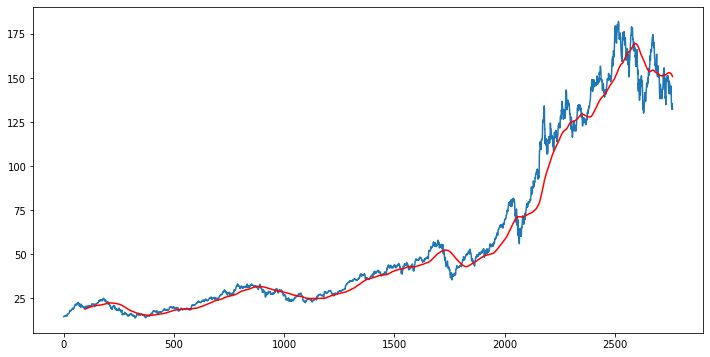

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2758    152.81895
2759    152.66495
2760    152.52995
2761    152.42000
2762    152.26640
Name: Close, Length: 2763, dtype: float64

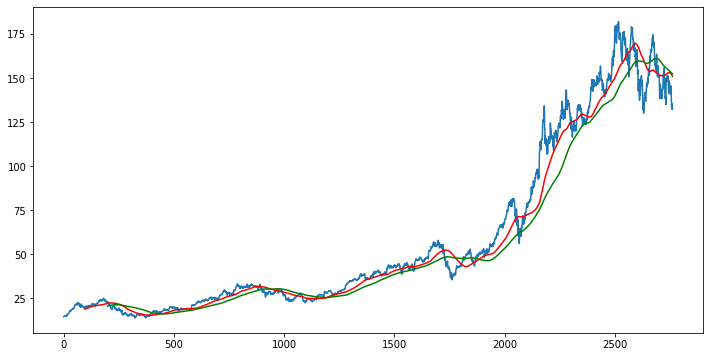

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
df.shape

(2763, 5)

In [ ]:
#splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1934, 1)
(829, 1)


In [ ]:
data_training.head()

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [ ]:
data_testing.head()

,Close
1934,55.897499
1935,55.772499
1936,54.687500
1937,54.974998
1938,55.174999


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.89329469],
       [0.89845695],
       [0.91280911]])

In [ ]:
data_training_array.shape

(1934, 1)

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(1834, 100, 1)

In [ ]:
#ML model

In [ ]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))




model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
58/58 [==============================] - 27s 357ms/step - loss: 0.0416
Epoch 2/50
58/58 [==============================] - 20s 347ms/step - loss: 0.0085
Epoch 3/50
58/58 [==============================] - 19s 323ms/step - loss: 0.0074
Epoch 4/50
58/58 [==============================] - 19s 329ms/step - loss: 0.0065
Epoch 5/50
58/58 [==============================] - 19s 325ms/step - loss: 0.0062
Epoch 6/50
58/58 [==============================] - 19s 323ms/step - loss: 0.0059
Epoch 7/50
58/58 [==============================] - 19s 323ms/step - loss: 0.0067
Epoch 8/50
58/58 [==============================] - 19s 325ms/step - loss: 0.0060
Epoch 9/50
58/58 [==============================] - 19s 326ms/step - loss: 0.0056
Epoch 10/50
58/58 [==============================] - 20s 348ms/step - loss: 0.0052
Epoch 11/50
58/58 [==============================] - 19s 327ms/step - loss: 0.0055
Epoch 12/50
58/58 [==============================] - 19s 328ms/step - loss: 0.0046
Epoch 13/50
5

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

,Close
1934,55.897499
1935,55.772499
1936,54.687500
1937,54.974998
1938,55.174999


In [ ]:
data_training.tail(100)

,Close
1834,50.965000
1835,51.132500
1836,51.869999
1837,51.790001
1838,51.320000
...,...
1929,52.297501
1930,53.320000
1931,53.314999
1932,53.542500


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [ ]:
final_df.head()

,Close
0,50.965000
1,51.132500
2,51.869999
3,51.790001
4,51.320000


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.05508887],
       [0.05629664],
       [0.06161444],
       [0.06103761],
       [0.05764862],
       [0.05588204],
       [0.05644085],
       [0.04933842],
       [0.0670945 ],
       [0.06462486],
       [0.06931175],
       [0.06341709],
       [0.05328622],
       [0.05335832],
       [0.04942856],
       [0.04304718],
       [0.02238886],
       [0.02768865],
       [0.03176262],
       [0.0302484 ],
       [0.02830154],
       [0.0176479 ],
       [0.0239752 ],
       [0.01708908],
       [0.01146483],
       [0.010221  ],
       [0.00888703],
       [0.0073548 ],
       [0.00901323],
       [0.00319069],
       [0.        ],
       [0.01142877],
       [0.01665643],
       [0.02148754],
       [0.03037457],
       [0.03475502],
       [0.03877491],
       [0.03765728],
       [0.03758516],
       [0.03504345],
       [0.03711648],
       [0.04533655],
       [0.04429101],
       [0.04715724],
       [0.04593142],
       [0.0455709 ],
       [0.04014494],
       [0.047

In [ ]:
input_data.shape

(929, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(829, 100, 1)
(829,)


In [ ]:
#making predictions

y_predicted = model.predict(x_test)

26/26 [==============================] - 3s 97ms/step


In [ ]:
y_predicted.shape

(829, 1)

In [ ]:
y_predicted

array([[0.12113203],
       [0.12186588],
       [0.12284407],
       [0.12401652],
       [0.1253137 ],
       [0.12667727],
       [0.12807393],
       [0.12945858],
       [0.13075347],
       [0.13190375],
       [0.13287072],
       [0.1336714 ],
       [0.1343284 ],
       [0.13485146],
       [0.13530637],
       [0.13576221],
       [0.13620134],
       [0.13660827],
       [0.13704158],
       [0.13755395],
       [0.13814007],
       [0.1388025 ],
       [0.13956968],
       [0.14052324],
       [0.14171034],
       [0.14312467],
       [0.14471447],
       [0.14642052],
       [0.14819318],
       [0.1500329 ],
       [0.15192944],
       [0.15389739],
       [0.15594208],
       [0.15808542],
       [0.16035908],
       [0.16268672],
       [0.16496377],
       [0.16716546],
       [0.16937752],
       [0.17169893],
       [0.1741801 ],
       [0.1768209 ],
       [0.17960894],
       [0.1825113 ],
       [0.1855005 ],
       [0.1885263 ],
       [0.19155908],
       [0.194

In [ ]:
scaler.scale_

array([0.00721059])

In [ ]:
scale_factor = 1/0.00721059
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

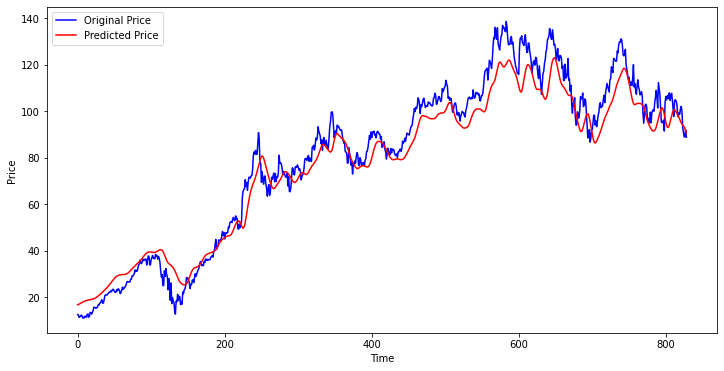

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()